In [80]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, count, date_format


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [81]:
spark = SparkSession.builder \
    .appName("SPARK TRAB - QUESTION 2 A") \
    .getOrCreate()

In [82]:
df_orig = spark.read.json("./data/eiffel-tower-reviews.json")

In [83]:
df_orig.show()

+--------------------+--------------------+-----------+--------------------+------------+------------+--------------------+--------------------+
|                 _id|              author|bubbleCount|         collectedAt|   createdAt|       query|                text|               title|
+--------------------+--------------------+-----------+--------------------+------------+------------+--------------------+--------------------+
|{5921cdae4b679c46...|{0, 0, Since this...|         50|{2017-05-21T17:26...|May 20, 2017|Eiffel_Tower|This is the most ...|Must do even it w...|
|{5921cdae4b679c46...|{10, 4, Since Aug...|         50|{2017-05-21T17:26...|May 20, 2017|Eiffel_Tower|My significant ot...|           A Classic|
|{5921cdae4b679c46...|{9, 4, Since Nov ...|         50|{2017-05-21T17:26...|May 20, 2017|Eiffel_Tower|We had a tour to ...|         Wet weather|
|{5921cdae4b679c46...|{16, 5, Since Apr...|         50|{2017-05-21T17:26...|May 20, 2017|Eiffel_Tower|Visited with my w...|    Not

In [84]:
df_orig.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- author: struct (nullable = true)
 |    |-- helpfulVotes: string (nullable = true)
 |    |-- level: string (nullable = true)
 |    |-- memberSince: string (nullable = true)
 |    |-- postForum: string (nullable = true)
 |    |-- ratings: string (nullable = true)
 |    |-- reviews: string (nullable = true)
 |-- bubbleCount: long (nullable = true)
 |-- collectedAt: struct (nullable = true)
 |    |-- $date: string (nullable = true)
 |-- createdAt: string (nullable = true)
 |-- query: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)


In [85]:
date = df_orig.select("createdAt").dropna()

date.groupBy("createdAt").agg(count("createdAt").alias("count")).orderBy(col("count").desc()).show()

+------------------+-----+
|         createdAt|count|
+------------------+-----+
|     July 25, 2016|   48|
|September 28, 2015|   46|
|   August 13, 2015|   37|
|    April 10, 2017|   35|
| September 8, 2016|   35|
|   August 14, 2015|   34|
|   August 10, 2016|   33|
|  October 17, 2016|   32|
|September 15, 2015|   32|
|  November 1, 2016|   31|
|  October 18, 2016|   29|
|    April 25, 2016|   27|
|    August 7, 2016|   27|
|  February 8, 2016|   27|
|      May 27, 2016|   27|
|     June 30, 2016|   27|
|      June 8, 2016|   26|
| September 2, 2015|   26|
|   August 23, 2016|   26|
|   August 18, 2015|   26|
+------------------+-----+


In [86]:
date = date.withColumn("date", to_date(date["createdAt"], "MMMM d, yyyy"))

date = date.withColumn("month_year", date_format("date", "MM/yy"))

date_count = date.groupBy("date").agg(count("date").alias("count"))

date_count2 = date.groupBy("month_year").agg(count("month_year").alias("count"))

date_count.show()

+----------+-----+
|      date|count|
+----------+-----+
|2016-03-01|   14|
|2017-01-06|   10|
|2016-04-25|   27|
|2016-10-03|   14|
|2016-08-31|    5|
|2016-08-15|    7|
|2016-07-26|   26|
|2016-05-03|   13|
|2015-12-22|   12|
|2015-09-02|   26|
|2017-02-26|    3|
|2016-01-28|   11|
|2017-01-24|   12|
|2016-12-19|    1|
|2016-11-08|    1|
|2016-07-17|    5|
|2015-09-28|   46|
|2016-08-23|   26|
|2016-07-03|   19|
|2017-02-16|    9|
+----------+-----+


In [87]:
date_count2 = date_count2.withColumn("date", to_date("month_year", "MM/yy"))

date_count2.show()

+----------+-----+----------+
|month_year|count|      date|
+----------+-----+----------+
|     04/16|  372|2016-04-01|
|     12/16|  143|2016-12-01|
|     11/15|  286|2015-11-01|
|     02/17|  164|2017-02-01|
|     01/17|  226|2017-01-01|
|     08/16|  487|2016-08-01|
|     01/16|  285|2016-01-01|
|     09/15|  423|2015-09-01|
|     04/17|  326|2017-04-01|
|     06/16|  396|2016-06-01|
|     08/15|  481|2015-08-01|
|     11/16|  243|2016-11-01|
|     10/16|  428|2016-10-01|
|     12/15|  268|2015-12-01|
|     10/15|  421|2015-10-01|
|     02/16|  292|2016-02-01|
|     05/17|  158|2017-05-01|
|     03/16|  304|2016-03-01|
|     03/17|  212|2017-03-01|
|     05/16|  352|2016-05-01|
+----------+-----+----------+


In [88]:
date_count_pd = date_count.toPandas()

date_count_pd2 = date_count2.toPandas()

In [89]:
sns.set(style="darkgrid", rc={
    "axes.facecolor": "#252434",
    "figure.facecolor": "#202124",
    "grid.color": "#37474f",
    "axes.edgecolor": "#202124",
    "font.size": 16,          
    "axes.labelsize": 20,     
    "axes.titlesize": 24,     
    "xtick.labelsize": 16,   
    "ytick.labelsize": 16  
})

In [90]:
plt.figure(figsize=(28, 12), facecolor='#202124')
sns.lineplot(x='date', y='count', data=date_count_pd, color='#ff3d2b', linewidth=2.5)

plt.xlabel('Data', color='#ffffff', fontsize=22)  
plt.ylabel('Número de Reviews', color='#ffffff', fontsize=22)  
plt.title('Distribuição Temporal de Reviews - Torre Eiffel', color='#ffffff', fontsize=28)  

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(color='#ffffff', fontsize=18) 
plt.yticks(color='#ffffff', fontsize=18) 

plt.tight_layout(pad=3.0)
plt.savefig('./outcome/Q2/temporal_distribution.pdf', facecolor='#202124', bbox_inches='tight')
plt.close()

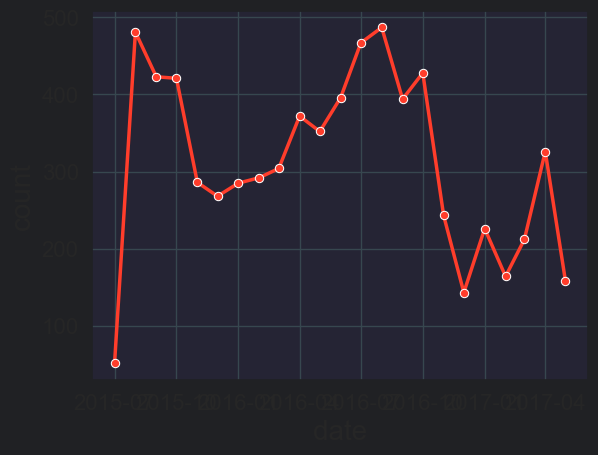

In [91]:
sns.lineplot(x='date', y='count', data=date_count_pd2, color='#ff3d2b', marker= "o", linewidth=2.5)
plt.show()

In [92]:
plt.figure(figsize=(28, 12), facecolor='#202124')
sns.lineplot(x='date', y='count', data=date_count_pd2, color='#ff3d2b', marker= "o", linewidth=2.5)

for x, y in zip(date_count_pd2['date'], date_count_pd2['count']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='white', fontsize=16, rotation=-25)

plt.xlabel('Data Agrupada por mês', color='#ffffff', fontsize=22)  
plt.ylabel('Número de Reviews', color='#ffffff', fontsize=22)  
plt.title('Distribuição Temporal de Reviews - Torre Eiffel', color='#ffffff', fontsize=28)  

plt.xticks(color='#ffffff', fontsize=18) 
plt.yticks(color='#ffffff', fontsize=18) 

plt.tight_layout(pad=3.0)
plt.savefig('./outcome/Q2/temporal_distribution2.pdf', facecolor='#202124', bbox_inches='tight')
plt.close()